# TinyML : White Wine Quality

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import random
random.seed(42)

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

## Dataset
- https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
df = pd.read_csv('./data/winequality-white.csv', delimiter=';')
df.shape

(4898, 12)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Verify if values are all non 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

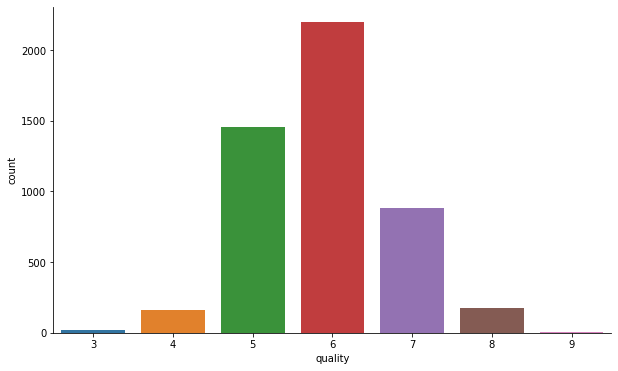

In [ ]:
sns.countplot(x=df['quality']);

In [ ]:
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [ ]:
features_list = list(df.columns[:-1])
features_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

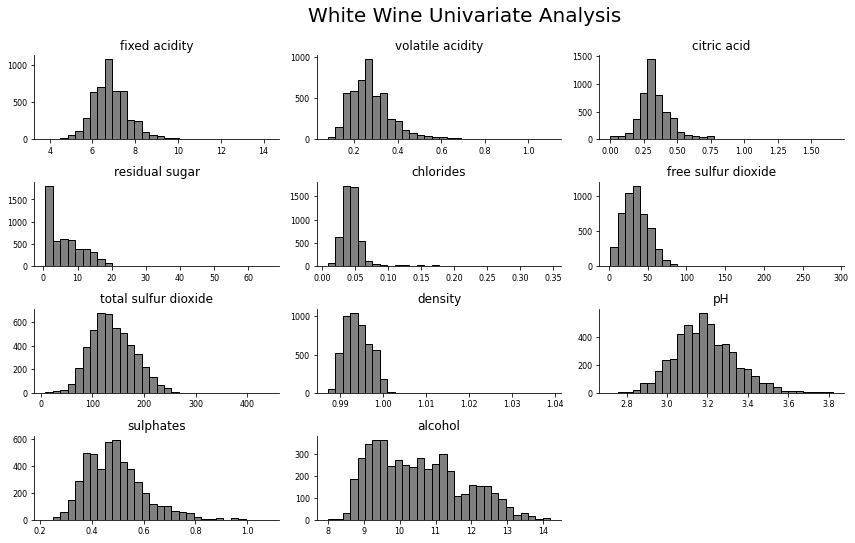

In [ ]:
df[features_list].hist(bins=30, 
                       edgecolor='black', 
                       linewidth=1.0,
                       xlabelsize=8, 
                       ylabelsize=8, 
                       grid=False, 
                       figsize=(10,6), 
                       color='grey')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('White Wine Univariate Analysis', x=0.65, y=1.25, fontsize=20); 

## Pre-Process data 

Change target to string

**Prepare transformer**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

transformer = make_column_transformer(
    (MinMaxScaler(), features_list)
)

**Split data**

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']
X.shape, y.shape

((4898, 11), (4898,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3918, 11), (980, 11))

**Scale values**

In [ ]:
# Fit on the train set
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((3918, 11), (980, 11))

In [ ]:
X_train[0]

array([0.4375    , 0.08823529, 0.21686747, 0.11656442, 0.05637982,
       0.28571429, 0.33333333, 0.108155  , 0.38181818, 0.22093023,
       0.70967742])

In [ ]:
X_train

array([[0.4375    , 0.08823529, 0.21686747, ..., 0.38181818, 0.22093023,
        0.70967742],
       [0.3125    , 0.16666667, 0.26506024, ..., 0.41818182, 0.34883721,
        0.24193548],
       [0.225     , 0.23529412, 0.19879518, ..., 0.48181818, 0.31395349,
        0.5       ],
       ...,
       [0.475     , 0.18627451, 0.31325301, ..., 0.27272727, 0.36046512,
        0.5483871 ],
       [0.3125    , 0.15686275, 0.1746988 , ..., 0.40909091, 0.18604651,
        0.41935484],
       [0.5375    , 0.18627451, 0.21084337, ..., 0.45454545, 0.47674419,
        0.38709677]])

In [ ]:
y_train

4665    6
1943    5
3399    6
843     7
2580    5
       ..
4426    6
466     6
3092    6
3772    6
860     8
Name: quality, Length: 3918, dtype: int64

In [ ]:
# Remember the number of samples in the test set
num_samples_train = len(X_train)
num_samples_train

3918

In [ ]:
num_samples_test = len(X_test)
num_samples_test

980

In [ ]:
X_train.shape[1]

11

## Uploading data to Edge Impulse

### Settings
Edge Impulse > your_project > Dashboard > Keys

In [ ]:
import random, os, PIL, json, time, hmac, hashlib, requests, threading, queue

In [1]:
EI_API_KEY = "ei_2e32874429d745748a77ae12dd653900daa08266beb0ff0623d4fb4e881d4182	" 
EI_HMAC_KEY = "7f4c65318b95d59e39137867be291280"

In [2]:
SENSORS_NAME = "wine_sensors"
INTERVAL_MS = 1 

Number of threads to run to upload data to Edge Impulse

In [3]:
NUM_THREADS = 20

In [ ]:
X_train.shape[1]

In [ ]:
len_vector = X_train.shape[1]

In [ ]:
random.seed(42)

Edge Impulse expect classes (label) as string, even for Regression. 

In [ ]:
y_train = np.char.mod('%d', y_train)
y_test = np.char.mod('%d', y_test)
y_train.shape, y_test.shape

In [ ]:
classes_values = list (set(y_train))
classes_values.sort()
classes_values

['3', '4', '5', '6', '7', '8', '9']

In [ ]:
test_classes_values = list (set(y_test))
test_classes_values.sort()
test_classes_values

['3', '4', '5', '6', '7', '8']

## Helper Functions
The following functions are used to assist in task of uploading samples to your Edge Impulse project.

In [ ]:
def create_json_wrapper():
    """
    Construct initial JSON wrapper as a template
    """

    # Start with all zeros. Hs256 gives 32 bytes and we encode in hex. So, we need 64 characters here.
    empty_signature = ''.join(['0'] * 64)

    # Create JSON wrapper for data
    data = {
      "protected": {
          "ver": "v1",
          "alg": "HS256",
          "iat": time.time()                  # Epoch time, seconds since 1970
      },
      "signature": empty_signature,
      "payload": {
          "device_type": "pre-made",          # Pre-made dataset (not collected)
          "interval_ms": INTERVAL_MS,         # Pretend it's interval of 1 ms
          "sensors": [
              { "name": SENSORS_NAME, "units": "B" } # Unitless ("Byte" data)
          ],
          "values": []
      }
    }

    return data

In [ ]:
def send_sample(data, label, test_set=False):
    """
    Send raw data sample to Edge Impulse project, return HTTP status code
    """

    # Encode message in JSON format
    encoded = json.dumps(data)

    # Sign message
    signature = hmac.new(bytes(EI_HMAC_KEY, 'utf-8'), 
                      msg = encoded.encode('utf-8'), 
                      digestmod = hashlib.sha256).hexdigest()

    # Set the signature in the message and encode data again to JSON format
    data['signature'] = signature
    encoded = json.dumps(data)

    # Construct URL based on dataset being sent
    if test_set:
        url = 'https://ingestion.edgeimpulse.com/api/testing/data'
    else:
        url = 'https://ingestion.edgeimpulse.com/api/training/data'

    # Upload the data to project
    res = requests.post(url=url,
                      data=encoded,
                      headers={
                          'Content-Type': 'application/json',
                          'x-file-name': str(label),
                          'x-api-key': EI_API_KEY
                      })

    return res

In [ ]:
def upload_sample(len_vector, is_test_set):
    """
    Pull sample and label from queue and send to Edge Impulse server. To be called within a thread.
    """

    global q

    while not q.empty():

        # Start with empty JSON wrapper
        data = create_json_wrapper()

        # Fill up values field (we need to convert to float to avoid JSON error)
        sample, label = q.get()
        for j in range(len_vector):
            data['payload']['values'].append(float(sample[j]))

        # Send sample
        res = send_sample(data, label, test_set=is_test_set)

        # Check response code
        if (res.status_code != 200):
            print("Failed to upload file to Edge Impulse", res.status_code, res.content)

## Upload training and test sets to Edge Impulse

In [ ]:
#Use many threads to send training data and labels to Edge Impulse project

# Fill queue with training data and labels
q = queue.Queue()
for i in range(num_samples_train):
    q.put((X_train[i], y_train[i]))

# Create and start threads
threads = []
for i in range(NUM_THREADS):
    threads.append(threading.Thread(target=upload_sample, args=(len_vector, False)))
    threads[i].start()

# Wait for threads to be done
for thread in threads:
    thread.join()

In [ ]:
### Use many threads to send test data and labels to Edge Impulse project

# Fill queue with test data and labels
q = queue.Queue()
for i in range(num_samples_test):
    q.put((X_test[i], y_test[i]))

# Create and start threads
threads = []
for i in range(NUM_THREADS):
    threads.append(threading.Thread(target=upload_sample, args=(len_vector, True)))
    threads[i].start()

# Wait for threads to be done
for thread in threads:
    thread.join()